In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
data = pd.read_csv('/content/insurance.csv')

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
d = data.duplicated().sum()
d

1

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


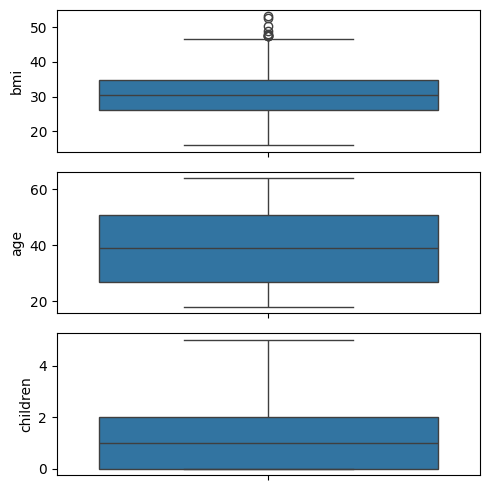

In [ ]:
fig , axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(data['bmi'], ax=axs[0])
plt2 = sns.boxplot(data['age'], ax=axs[1])
plt3 = sns.boxplot(data['children'], ax=axs[2])
plt.tight_layout()

<Axes: ylabel='charges'>

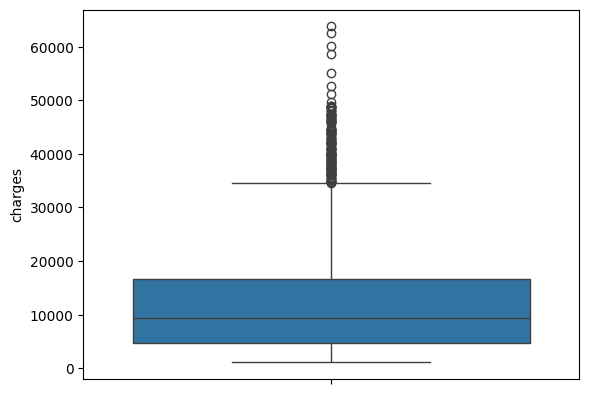

In [ ]:
sns.boxplot(data['charges'])

In [ ]:
le = LabelEncoder()
data1 = data.copy()
data1['sex'] = le.fit_transform(data1['sex'])
data1['smoker'] = le.fit_transform(data1['smoker'])
data1['region'] = le.fit_transform(data1['region'])

In [ ]:
data1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = data1['charges']
x = data1.drop('charges', axis=1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
lr.score(x_test, y_test)

0.8068466322629112

In [ ]:
lr.predict([[18, 1, 33.770, 1, 0, 2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3946.04935401])

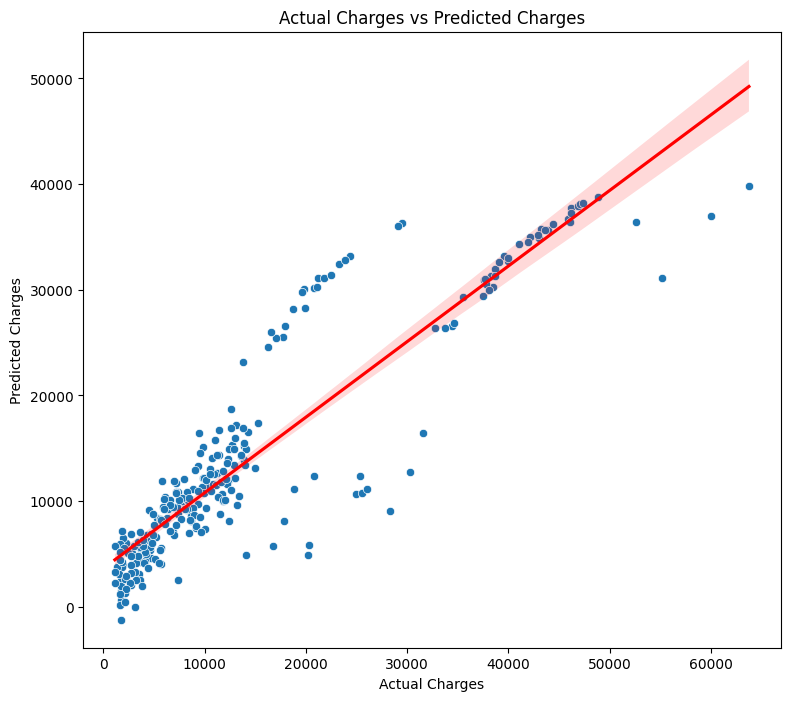

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9, 8))
sns.scatterplot(x=y_test, y=y_pred)
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red')  # Adds the regression line
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual Charges vs Predicted Charges')
plt.show()